# Question 4: Logistic Regression

In [1]:
#Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [2]:
# load the data
X1 = pd.read_csv('class0-input.csv')
X2 = pd.read_csv('class1-input.csv')

labels = pd.read_csv('labels.csv')
# Perform important operations on the data
X = pd.concat([X1,X2]).to_numpy()
Y = labels.label.to_numpy()

## Check the shape

In [3]:
# Shape of X
print(X.shape)
# Shape of Y
print(Y.shape)

(10000, 2)
(10000,)


## Visualize the data

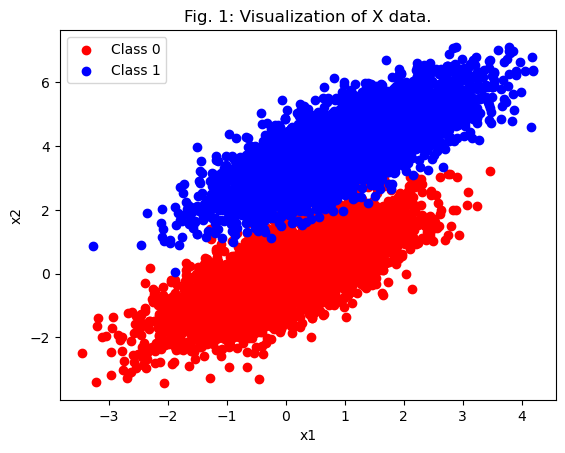

In [4]:
# Use different colors for each class
# Use plt.scatter
# Dont forget to add axes titles, graph title, legend
plt.scatter(X[Y == 0][:,0], X[Y == 0][:,1], c = 'red')
plt.scatter(X[Y == 1][:,0], X[Y == 1][:,1], c = 'blue')
# plt.scatter(X[5000:,0], X[5000:,1], c = 'blue')
plt.legend(['Class 0','Class 1'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Fig. 1: Visualization of X data.')
plt.show()

## Define the required functions

In [5]:
# Pass in the required arguments
# Implement the sigmoid function
def sigmoid(weights, X):
    e = weights[0]
    for i in range(1,len(weights)):
        e += weights[i]*X[:,i-1]
    e = np.exp(e)
    sig = e / (1 + e)
    return sig

In [6]:
# Pass in the required arguments
# The function should return the gradients
def calculate_gradients(pred, X, Y):
    grads = np.array(np.mean(Y - pred))
    for i in range(X.shape[1]):
        grads = np.append(grads,np.mean((Y - pred)*X[:,i]))
    return grads

In [7]:
# Update the weights using gradients calculated using above function and learning rate
# The function should return the updated weights to be used in the next step
def update_weights(prev_weights, current_grads, learning_rate):
    
    for i in range(len(prev_weights)):
        prev_weights[i] = prev_weights[i] + learning_rate*current_grads[i]
    return prev_weights

In [8]:
# Use the implemented functions in the main function
# 'main' function should return weights after all the iterations
# Dont forget to divide by the number of datapoints wherever necessary!
# Initialize the intial weights randomly

def main(X, Y, learning_rate = 0.00005, num_steps = 50000):
    np.random.seed(24787)
    weights = np.random.rand(3)
    x1 = X
    for i in range(num_steps):
        sig = sigmoid(weights, X)
        grads = calculate_gradients(sig, X, Y)
        weights = update_weights(weights, grads, learning_rate)
    sig = sigmoid(weights, X)
    grads = calculate_gradients(sig, X, Y)
    weights = update_weights(weights, grads, learning_rate)
    return weights

In [9]:
# Pass in the required arguments (final weights and input)
# The function should return the predictions obtained using sigmoid function.
def predict(weights, X):
    Y_hat = sigmoid(weights, X)
    return Y_hat

In [10]:
# Use the final weights to perform prediction using predict function
# Convert the predictions to '0' or '1'
# Calculate the accuracy using predictions and labels

B = main(X,Y)

In [11]:
final_prediction = predict(B,X)

for i in range(len(final_prediction)):
    if final_prediction[i] >= 0.5:
        final_prediction[i] = 1
    else : final_prediction[i] = 0


In [12]:
accuracy = (final_prediction == Y).mean()
print("Accuracy of logistic regression model is: ", accuracy)

Accuracy of logistic regression model is:  0.7966


## Visualize the misclassification

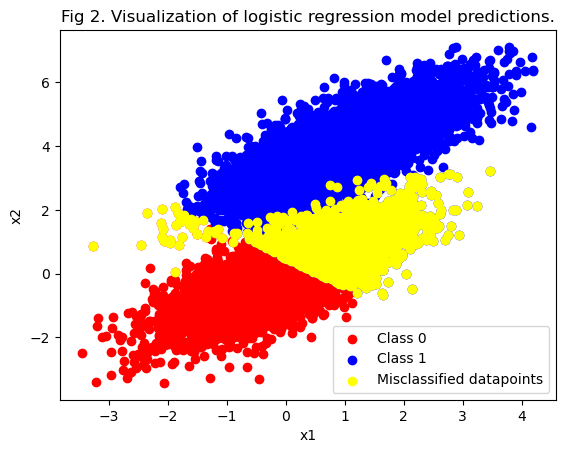

In [13]:
# Use different colors for class 0, class 1 and misclassified datapoints
# Use plt.scatter
# Dont forget to add axes titles, graph title, legend
plt.scatter(X[final_prediction == 0][:,0], X[final_prediction == 0][:,1], c = 'red')
plt.scatter(X[final_prediction == 1][:,0], X[final_prediction == 1][:,1], c = 'blue')
plt.scatter(X[(final_prediction - Y)  != 0][:,0], X[(final_prediction - Y) != 0][:,1], c = 'yellow')
plt.legend(['Class 0', 'Class 1', 'Misclassified datapoints'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Fig 2. Visualization of logistic regression model predictions.")
plt.show()

## Compare the results with sklearn's Logistic Regression

In [14]:
# import sklearn and necessary libraries
from sklearn.linear_model import LogisticRegression

In [15]:
# Print the accuracy obtained by sklearn and your model
skmodel = LogisticRegression().fit(X,Y)

In [16]:
skmodel.score(X,Y)

0.9948

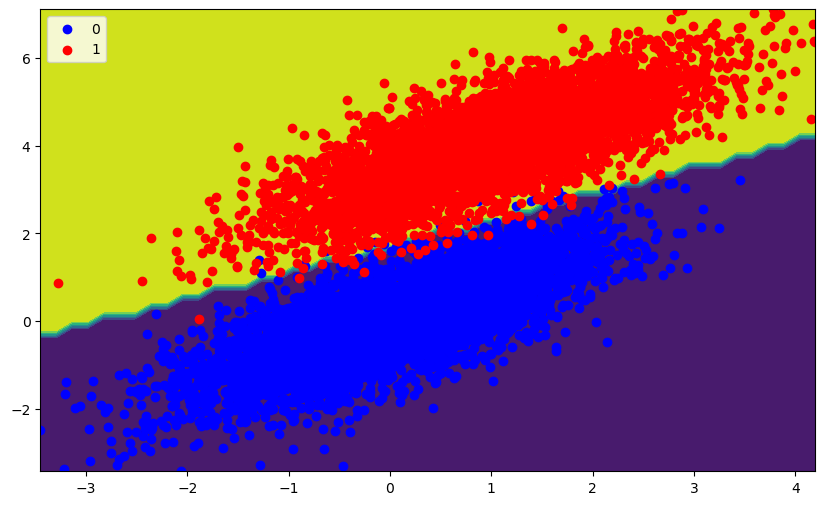

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='b', label='0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = skmodel.predict(grid).reshape(xx1.shape)
plt.contourf(xx1, xx2, probs);
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='b', label='0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='r', label='1')

With the given hyperparameters, the sklearn model has much better accuracy than my logistic regression model, at 20% higher accuracy score.

Worth noting that, changing the learning rate of my model (removing a 0), its accuracy becomes much closer to the one given by sklearn.